1) Filter Implementation 

Consider the moving average filter for M = 3,compute its system function H, plot its poles and zeros in the complex plane

Given

$$
y(n) = \frac{1}{3} * (x(n) + x(n - 1) + x(n - 2))
$$

Thereforethe system function is as follows:

$$
H(z) = \frac{1}{3} * (1 + z^{-1} + z^{-2})
$$

Simplification:


$$
H(z) = \frac{z^2 + z + 1}{3z^2} 
$$

More detailed calculations in the report.

The zeros are when $H(z) = 0$ 

We can write the function in the following form:

$$
H(z) = \frac{(z - e^{-\frac{2}{3}iπ})(z - e^{\frac{2}{3}iπ})}{3z^2} 
$$

Therefore zeros $= \{e^{-\frac{2}{3}iπ}, e^{\frac{2}{3}iπ}\}$

The poles are all z where $H(z) = ∞$

In our case we have a $2^{nd}$ order pole at $z = 0$

In [43]:
# importing the libraries needed
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


In [44]:
M = 3
a = [1,1,1]
b = [0,0,3]
x = np.random.randn(3) #10 random samples for x
y = signal.convolve(x,b) #filter output using convolution
y = signal.lfilter(b,a,x) #filter output using lfilter function
w, h = signal.freqz(b,a)


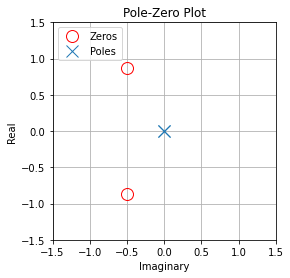

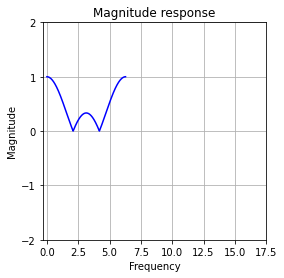

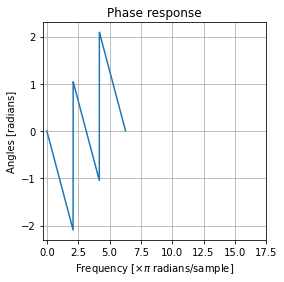

In [45]:
from  matplotlib import patches
from numpy.polynomial import Polynomial
from scipy.fftpack import fftshift
M = 3
b = [1,1,1]
a = [3,0,0]

z, p,k = signal.tf2zpk(b, a) # Transfer function to Pole-Zero representation
w, h = signal.freqz(b, a, whole = True,worN=1024)
fig, (ax) = plt.subplots(nrows=1,ncols=1, figsize=(4, 4))

ax.plot(np.real(z), np.imag(z), 'ob',label='Zeros', markersize =12,  markerfacecolor='None', markeredgecolor='red')
ax.plot(np.real(p), np.imag(p), 'x', label='Poles', markersize =12)
ax.legend(loc=2)
ax.set(title='Pole-Zero Plot',ylabel='Real',xlabel='Imaginary')
ticks = np.arange(-1.5,2.0,0.5)
ticks2 = np.arange(-1.5,2.0,0.5)
ax.set_xticks(ticks)
ax.set_yticks(ticks2)
ax.grid()

fig, (ax) = plt.subplots(nrows=1,ncols=1, figsize=(4, 4))



ax.plot(w,(np.abs(h)),'b')
ax.set(title='Magnitude response',xlabel='Frequency',ylabel='Magnitude')
ticks3 = np.arange(0,20.0,2.5)
ticks4 = np.arange(-2.0,3.0,1.0)
ax.set_yticks(ticks4)
ax.set_xticks(ticks3)
ax.grid()
  #Plot Phase-frequency response
    
fig, (ax) = plt.subplots(nrows=1,ncols=1, figsize=(4, 4))
angles = np.angle(h)
ax.plot(w, angles)
ax.set_xticks(ticks3)
ax.set_yticks(ticks4)
ax.set(title='Phase response',xlabel=r'Frequency [$\times \pi$ radians/sample]',ylabel='Angles [radians]')
ax.grid()


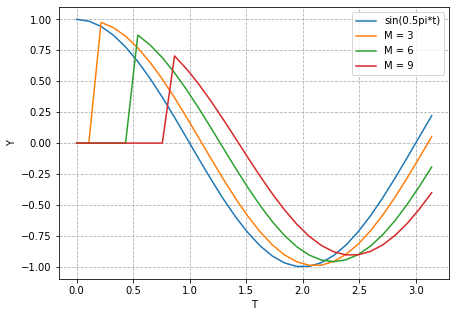

In [46]:
t = np.linspace(0, np.pi, 30)
x = [np.cos(0.5*np.pi*ti) for ti in t]

"""
    Method that will compute Moving Average Filter for any value of Argument M
"""
def MAF(x, M):
    new_M = (M - 1)
    y = [0] * new_M
    lengthX = len(x)
    for i in range(new_M, lengthX):
        temp = 0
        for j in range((i - M) + 1, i + 1):
            temp = temp + x[j]
        temp = temp / M
        y.append(temp)
    return y

"""
    computing the filter for different values of the provided M
"""
y_3 = MAF(x, 3)
y_6 = MAF(x, 6)
y_9 = MAF(x, 9)

"""
    displaying the results using plotting
"""
fig, ax = plt.subplots(1, 1, figsize=(7,5))
l = "sin(0.5pi*t)"
ax.plot(t, x, label=l)

""" 
    filtered functions
"""
lable1 = "M = 3"
lable2 = "M = 6"
lable3 = "M = 9"
ax.plot(t, y_3, label=lable1)
ax.plot(t, y_6, label=lable2)
ax.plot(t, y_9, label=lable3)
ax.legend()
xLable = "T"
ax.set_xlabel(xLable)
yLable = "Y"
ax.set_ylabel(yLable)
line = '--'
ax.grid(linestyle=line)

2. The Window Method

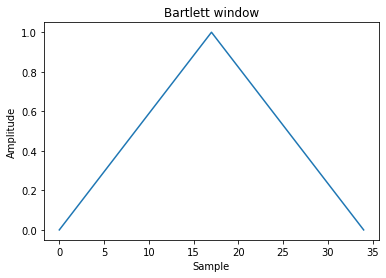

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
window = np.bartlett(35)
plt.plot(window)
plt.title("Bartlett window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

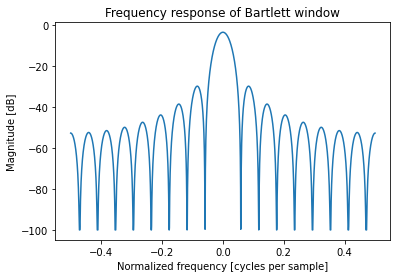

In [48]:
window = np.bartlett(35)
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)
plt.title("Frequency response of Bartlett window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()

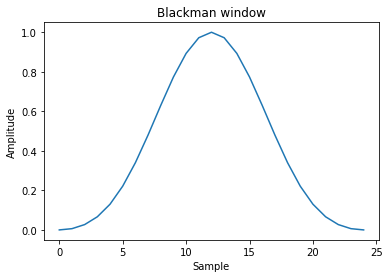

In [49]:
window = np.blackman(25)
plt.plot(window) 
plt.title("Blackman window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 

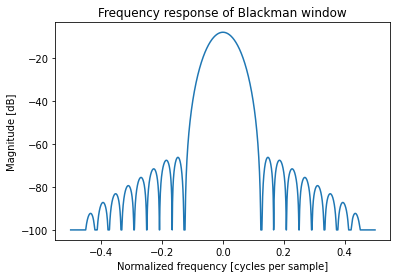

In [50]:
window = np.blackman(25)
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)  
plt.plot(freq, response)
plt.title("Frequency response of Blackman window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()

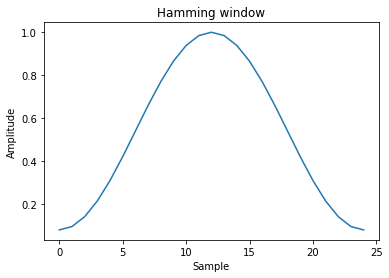

In [51]:
window = np.hamming(25)  
plt.plot(window) 
plt.title("Hamming window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 

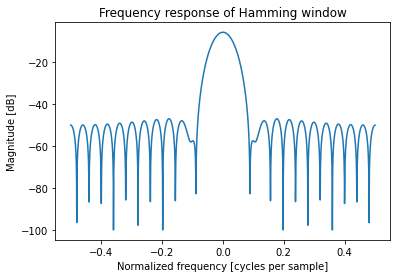

In [52]:
window = np.hamming(25)
plt.figure()  
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)  
plt.plot(freq, response)
plt.title("Frequency response of Hamming window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()

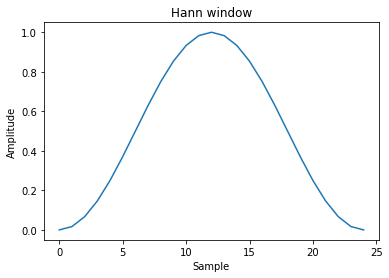

In [53]:
window = np.hanning(25)  
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


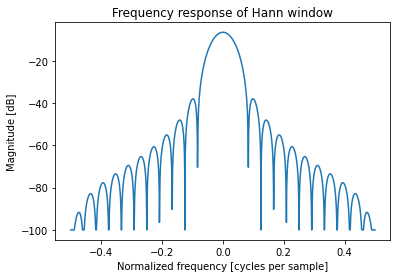

In [54]:
window = np.hanning(25)
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
try :
    response = 20 * np.log10(mag)
    response = np.clip(response, -100, 100)  
    plt.plot(freq, response)
    plt.title("Frequency response of Hann window")
    plt.ylabel("Magnitude [dB]")
    plt.xlabel("Normalized frequency [cycles per sample]")
    plt.axis("tight")
    plt.show()
except ZeroDivisionError:
    plt.show()

Window method using scipy.signal.windows library

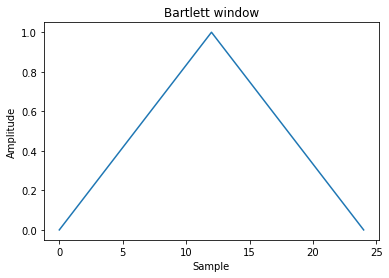

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


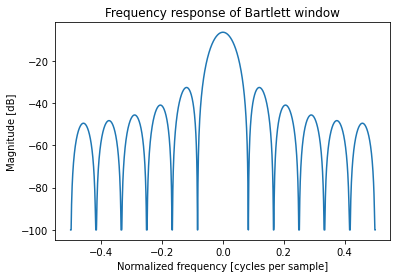

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy.fft import fft, fftshift
window = scipy.signal.windows.bartlett(25, sym=True)  
plt.plot(window)
plt.title("Bartlett window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()
window = scipy.signal.windows.bartlett(25, sym=True)   
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)
plt.title("Frequency response of Bartlett window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()

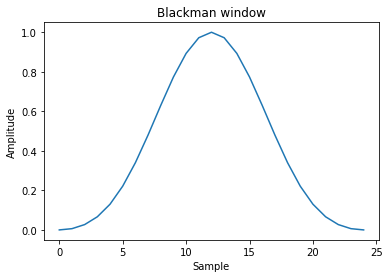

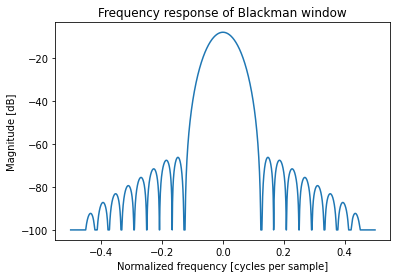

In [56]:
window = scipy.signal.windows.blackman(25, sym=True)
plt.plot(window) 
plt.title("Blackman window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 
window = scipy.signal.windows.blackman(25, sym=True)
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)  
plt.plot(freq, response)
plt.title("Frequency response of Blackman window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()


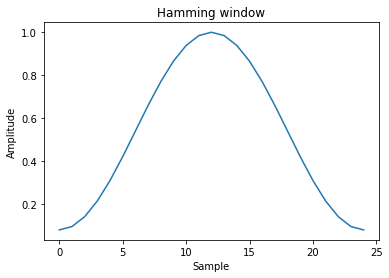

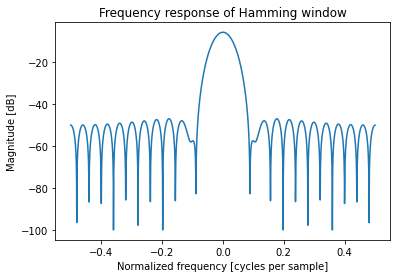

In [57]:
window = scipy.signal.windows.hamming(25, sym=True)
plt.plot(window) 
plt.title("Hamming window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 
window = scipy.signal.windows.hamming(25, sym=True)
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)  
plt.plot(freq, response)
plt.title("Frequency response of Hamming window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()

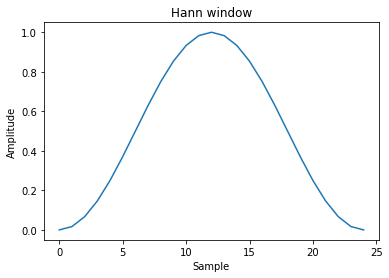

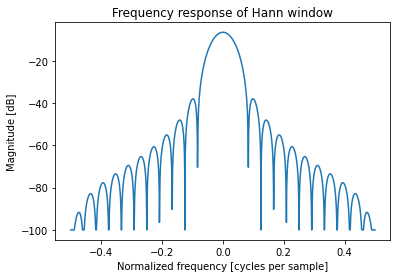

In [58]:
window = scipy.signal.windows.hann(25, sym=True)
plt.plot(window) 
plt.title("Hann window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 
window = scipy.signal.windows.hann(25, sym=True)
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)  
plt.plot(freq, response)
plt.title("Frequency response of Hann window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.show()